In [156]:
# Importando bibliotecas utilizadas no projeto
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
dataset = 'Tomato pest image enhancement'
height, width = 299, 299
batch_size = 32
SEED = 123
training = keras.utils.image_dataset_from_directory(
    dataset,
    labels='inferred',
    validation_split=.2,
    image_size=(height, width),
    class_names = None,
    subset='training',
    seed=SEED,
    label_mode='categorical',
    shuffle=True
)

Found 4263 files belonging to 8 classes.
Using 3411 files for training.


In [3]:
validation = keras.utils.image_dataset_from_directory(
    dataset,
    labels='inferred',
    validation_split=.2,
    image_size=(height, width),
    class_names = None,
    subset='validation',
    seed=SEED,
    shuffle=True,
    label_mode='categorical'
)

Found 4263 files belonging to 8 classes.
Using 852 files for validation.


In [4]:
class_names = training.class_names

In [5]:
base_model = keras.applications.ResNet50(
    include_top=False,
    input_shape = (height, width, 3),
    pooling='avg',
    classes=8,
    weights='imagenet'
)
for layer in base_model.layers:
    layer.trainable = False

In [6]:
model = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(8, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 24,640,904
Trainable params: 1,053,192
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(training, validation_data=validation, epochs=10)

Epoch 1/10
107/107 [==============================] - 30s 228ms/step - loss: 0.6819 - accuracy: 0.7751 - val_loss: 0.3192 - val_accuracy: 0.8955
Epoch 2/10
107/107 [==============================] - 23s 217ms/step - loss: 0.1612 - accuracy: 0.9505 - val_loss: 0.2063 - val_accuracy: 0.9331
Epoch 3/10
107/107 [==============================] - 23s 218ms/step - loss: 0.0814 - accuracy: 0.9774 - val_loss: 0.1272 - val_accuracy: 0.9648
Epoch 4/10
107/107 [==============================] - 23s 216ms/step - loss: 0.0431 - accuracy: 0.9912 - val_loss: 0.1319 - val_accuracy: 0.9589
Epoch 5/10
107/107 [==============================] - 24s 220ms/step - loss: 0.0215 - accuracy: 0.9968 - val_loss: 0.1012 - val_accuracy: 0.9718
Epoch 6/10
107/107 [==============================] - 23s 218ms/step - loss: 0.0120 - accuracy: 0.9979 - val_loss: 0.1069 - val_accuracy: 0.9695
Epoch 7/10
107/107 [==============================] - 23s 218ms/step - loss: 0.0098 - accuracy: 0.9979 - val_loss: 0.0963 - val_ac

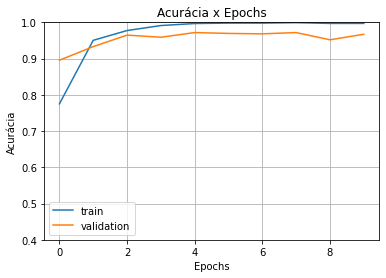

In [186]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1) 
plt.grid()
plt.title('Acurácia x Epochs')
plt.ylabel('Acurácia')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [227]:
classes = validation.class_names
classes

['BA', 'HA', 'MP', 'SE', 'SL', 'TP', 'TU', 'ZC']

In [228]:
y_true = []
y_pred = []
validation_images = []
for images, labels in validation:
    for label in labels:
        y_true.append(label)
    for image in images:
        validation_images.append(image)
        y_pred.append(model.predict(np.expand_dims(image, axis=0)))
y_true = np.array(y_true)
y_pred = np.array(y_pred)


In [229]:
y_true_max = np.argmax(y_true, axis=1)
y_pred_max = np.argmax(y_pred, axis=2).flatten()


In [234]:
y_true[0]

array([0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [231]:
from sklearn.metrics import classification_report, f1_score
report = classification_report(y_true_max, y_pred_max)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        77
           1       0.92      0.97      0.94       150
           2       0.97      0.99      0.98       181
           3       1.00      0.88      0.93       105
           4       0.96      0.95      0.96       130
           5       1.00      0.97      0.98        33
           6       0.98      0.98      0.98       118
           7       0.98      1.00      0.99        58

    accuracy                           0.97       852
   macro avg       0.97      0.97      0.97       852
weighted avg       0.97      0.97      0.97       852



In [232]:
wrong_images = []
for index, test in enumerate(y_pred_max):
    if(y_pred_max[index] != y_true_max[index]):
        wrong_images.append(index)

3
1


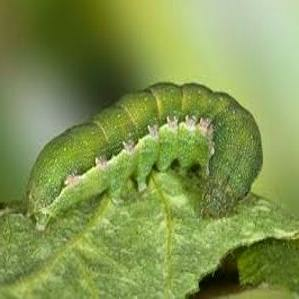

In [239]:
print(y_true_max[wrong_images[6]])
print(y_pred_max[wrong_images[6]])
keras.preprocessing.image.array_to_img(validation_images[wrong_images[6]])

In [236]:
accuracy_score(y_true_max, y_pred_max)

0.9671361502347418